# Final Project: Houston Pre/Post Flooding

## import packages

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [14]:
import sklearn  as sk
import pylab as pl
from sklearn.cluster import KMeans
from sklearn import linear_model

from sklearn.decomposition import PCA

In [8]:
import matplotlib.pyplot as plt

## read from csv file

In [9]:
houserate = pd.read_csv(r'C:\\Users\\laura\\Desktop\\COMSC-4393\datadata.csv',encoding='latin1', header=0)

FileNotFoundError: File b'C:\\\\Users\\\\laura\\\\Desktop\\\\COMSC-4393\\datadata.csv' does not exist

# K-means

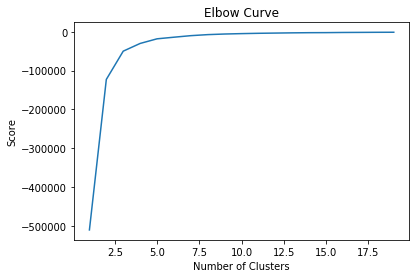

In [6]:
#The variables for which we want to see a correlation. Years can be linked to major disasters
#while Indexing has to do with house pricing. because this has spanned over 20 years, and is linear it 
#is very easy to see trends or dips in the graph that could be due to disasters

Y = houserate[['index_nsa']]

X = houserate[['yr']]

#Helps calculate an approximate good starting number of clusters. between 1 and 20
Nc = range(1, 20)


kmeans = [KMeans(n_clusters=i) for i in Nc]

#kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

#score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

#here the elbow curve shows the amount of clusters to use and it is apparent that either 2 or 3 is the correct amount
#after 3 clusters it is apparent there is no further gain in adding more clusters. and maybe detrimental to runtime

In [2]:
pca = PCA(n_components=1).fit(Y)

pca_d = pca.transform(Y)

pca_c = pca.transform(X)

#The PCA Transform makes it so the data fits a more linear graph and is not as dispersed 
#not too much an issue in ours though its very linear

kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y)

kmeansoutput

#this is the actual magic of KMeans. we declare our cluster as 3 based off the elbow curve and then create a graph

pl.figure('3 Cluster K-Means')

pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

pl.xlabel('Year')

pl.ylabel('Index')

pl.title('3 Cluster K-Means')

pl.show()

#simple labeling and showing of the graph.
#the Graph clearly shows a positve correlation between years and housing index indicating a slow increase, 
#however there are dips in this constant linear increase.


NameError: name 'PCA' is not defined

### Reference 1: https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn

# Correlation

In [4]:
def correlation_matrix(houserate):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(houserate.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=['yr','index_nsa']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.35,-.40,-.30,-.20,-.10,0,.10,.20,.30,.45,.50,.65,.70,.85,1])
    plt.show()
    #https://dzone.com/articles/linear-regression-using-python-scikit-learn
    #https://www.codespeedy.com/linear-regression-with-scikit-learn-in-python/
#correlation_matrix(houserate) need to test on lauras to see if this works. I cant run on mine.

NameError: name 'houserate' is not defined

## References 2
### https://dzone.com/articles/linear-regression-using-python-scikit-learn
### https://www.codespeedy.com/linear-regression-with-scikit-learn-in-python/

# Descriptive Statistics

In [9]:
print (houserate.describe().round(2))
#some interesting stats about the mean of the housing index!

       place_id       yr  period  index_nsa
count     171.0   171.00  171.00     171.00
mean    26420.0  1996.88    2.49     135.55
std         0.0    12.38    1.12      54.78
min     26420.0  1976.00    1.00      51.59
25%     26420.0  1986.00    1.50      94.43
50%     26420.0  1997.00    2.00     107.95
75%     26420.0  2007.50    3.00     181.08
max     26420.0  2018.00    4.00     281.09


# Linear Regression

In [21]:
reg=linear_model.LinearRegression()

reg.fit(houserate['yr'],houserate['index_nsa'])


m=reg.coef_[0]
b=reg.intercept_
print("slope=",m, "intercept=",b)

AttributeError: 'LinearRegression' object has no attribute 'reshape'

Text(0,0.5,'index_nsa')

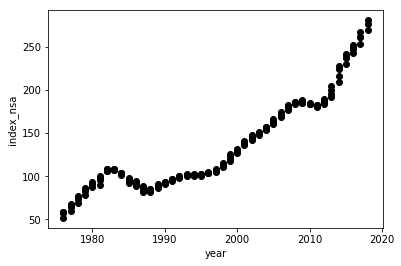

In [13]:
import matplotlib.pyplot as plt
plt.scatter(houserate['yr'],houserate['index_nsa'],color='black')
plt.xlabel("year")
plt.ylabel("index_nsa")